In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras
import h5py
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [112]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [19]:
df = pd.read_excel("空氣品質.xlsx")     

In [2]:
stock_name = '^GSPC'
seq_len = 22
d = 0.2
shape = [4, seq_len, 1] # feature, window, output
neurons = [128, 128, 32, 1]
epochs = 300

In [104]:
def get_df_data(stock_name, normalize=True):
    #df.drop(['Volume', 'Close'], 1, inplace=True)
    
    if normalize:        
        min_max_scaler = preprocessing.MinMaxScaler()
        df['總站日數'] = min_max_scaler.fit_transform(df.總站日數.values.reshape(-1,1))
        df['良好站日數'] = min_max_scaler.fit_transform(df.良好站日數.values.reshape(-1,1))
        df['普通站日數'] = min_max_scaler.fit_transform(df.普通站日數.values.reshape(-1,1))
        df['對敏感族群不健康站日數'] = min_max_scaler.fit_transform(df.對敏感族群不健康站日數.values.reshape(-1,1))
        df['對所有族群不健康站日數'] = min_max_scaler.fit_transform(df.對所有族群不健康站日數.values.reshape(-1,1))
        df['非常不健康站日數'] = min_max_scaler.fit_transform(df.非常不健康站日數.values.reshape(-1,1))
        df['危害站日數'] = min_max_scaler.fit_transform(df.危害站日數.values.reshape(-1,1))
        df['AQI大於100日數比率'] = min_max_scaler.fit_transform(df.AQI大於100日數比率.values.reshape(-1,1))
    return df

df = get_df_data(stock_name, normalize=True)

In [21]:
df.head()

,統計期,統計區,總站日數,良好站日數,普通站日數,對敏感族群不健康站日數,對所有族群不健康站日數,非常不健康站日數,危害站日數,AQI大於100日數比率
0,108年 7月,連江縣,0.001638,0.016181,0.005484,0.000000,0.0,0.0,0.0,0.000000
1,108年 7月,金門縣,0.001638,0.014887,0.007313,0.000000,0.0,0.0,0.0,0.000000
2,108年 7月,嘉義市,0.001638,0.018123,0.001828,0.001852,0.0,0.0,0.0,0.043537
3,108年 7月,新竹市,0.001638,0.018770,0.001828,0.000000,0.0,0.0,0.0,0.000000
4,108年 7月,基隆市,0.001638,0.019417,0.000914,0.000000,0.0,0.0,0.0,0.000000


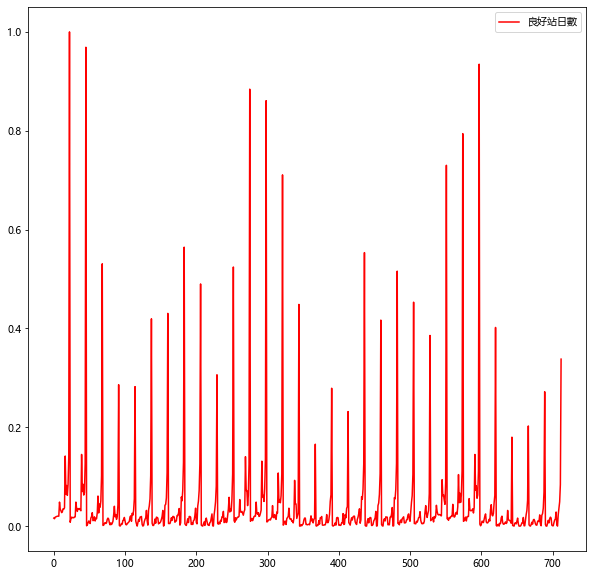

In [124]:
def plot_df(stock_name):
    df = get_df_data(stock_name, normalize=True)
 
    plt.plot(df['良好站日數'], color='red', label='良好站日數')
    plt.legend(loc='best')
    plt.show()
plot_df(stock_name)

In [96]:
from sklearn.model_selection  import train_test_split
exam_X=df[['總站日數','良好站日數','普通站日數']]
exam_y=df[['AQI大於100日數比率']]
train_X,test_X,train_y,test_y =train_test_split(exam_X,exam_y,train_size=0.9)
print('訓練集大小',train_X.shape,train_y.shape)
print('測試集大小',test_X.shape,test_y.shape)

訓練集大小 (641, 1) (641, 1)
測試集大小 (72, 1) (72, 1)


In [97]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(train_X,train_y)
print('模型得分為',round(model.score(test_X,test_y),4))

模型得分為 -0.0087


In [122]:
rDf=df.corr()
rDf

,總站日數,良好站日數,普通站日數,對敏感族群不健康站日數,對所有族群不健康站日數,非常不健康站日數,危害站日數,AQI大於100日數比率
總站日數,1.000000,0.881184,0.945910,0.810516,0.724222,0.301002,NaN,0.022110
良好站日數,0.881184,1.000000,0.694654,0.470062,0.442493,0.162075,NaN,-0.133542
普通站日數,0.945910,0.694654,1.000000,0.881340,0.744180,0.308292,NaN,0.068634
對敏感族群不健康站日數,0.810516,0.470062,0.881340,1.000000,0.902358,0.403000,NaN,0.278985
對所有族群不健康站日數,0.724222,0.442493,0.744180,0.902358,1.000000,0.581549,NaN,0.299344
非常不健康站日數,0.301002,0.162075,0.308292,0.403000,0.581549,1.000000,NaN,0.136764
危害站日數,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AQI大於100日數比率,0.022110,-0.133542,0.068634,0.278985,0.299344,0.136764,NaN,1.000000


(9, 0)

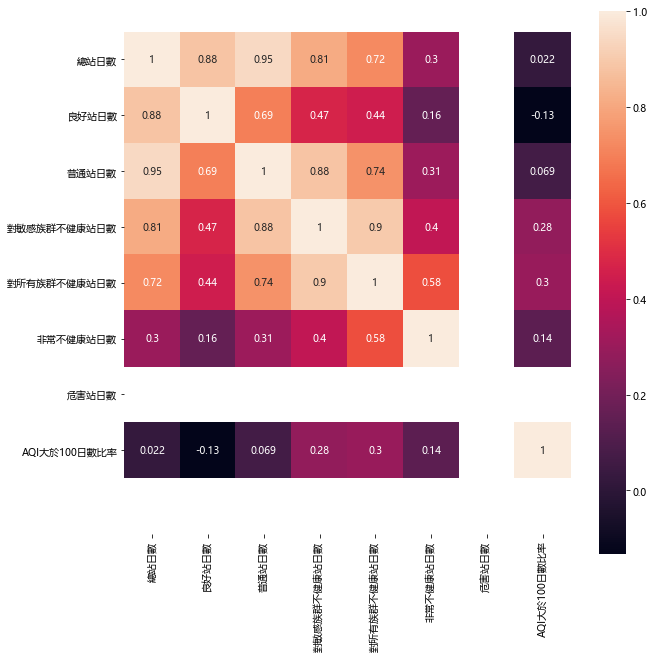

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)

# original code
import seaborn as sns
a = sns.heatmap(rDf, square=True ,vmax=1.0, linecolor='white', annot=True)
a.set_ylim(9,0)   #Bug處理後的結果